In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Concatted/pressure_data.csv')
print("Datensatz erfolgreich geladen: \n", df.head(5))

Datensatz erfolgreich geladen: 
      P4-B14    P5-B13    P6-B12    P7-B11    P8-B10   P13-B20   P14-B08  \
0  2.226661  2.310632  1.915811  2.165019  1.802742  1.831228  1.884819   
1  2.237491  2.324412  1.924254  2.184315  1.855768  1.831228  1.890925   
2  2.233881  2.338192  1.921842  2.176045  1.830460  1.831228  1.887262   
3  2.238694  2.365751  1.925460  2.180180  1.859383  1.833635  1.894589   
4  2.230271  2.314766  1.915811  2.153992  1.841306  1.827618  1.886041   

    P15-B09   P17-B05               exp  Slugflow  AirFlow  WaterFlow  
0  1.783888  0.899455  0912Test10_100_1         0      100          1  
1  1.789922  0.904265  0912Test10_100_1         0      100          1  
2  1.787508  0.897049  0912Test10_100_1         0      100          1  
3  1.791128  0.901058  0912Test10_100_1         0      100          1  
4  1.783888  0.899455  0912Test10_100_1         0      100          1  


In [3]:
##dataprep
drop_col = ['exp', 'Slugflow', 'AirFlow', 'WaterFlow']
col = list(df.columns)
col = [i for i in col if i not in drop_col]
##Allg. Metriken
df = df[df['P4-B14'] <= 50]
df = df[df['P5-B13'] >= -50]

In [4]:
metr = df[col].describe()
print(metr)
#metr.to_excel("PressureDescriptiveMetrics.xlsx", sheet_name="Sheet_LongData_1")


             P4-B14        P5-B13        P6-B12        P7-B11        P8-B10  \
count  5.348261e+06  5.348261e+06  5.348261e+06  5.348261e+06  5.348261e+06   
mean   2.341130e+00  2.447945e+00  2.007325e+00  2.239641e+00  1.864486e+00   
std    8.023597e-01  6.813360e-01  5.068570e-01  5.495071e-01  4.545812e-01   
min    1.354253e+00  1.470065e+00  1.293412e+00  1.244306e+00  1.098948e+00   
25%    1.734502e+00  1.924798e+00  1.625117e+00  1.816306e+00  1.509896e+00   
50%    2.069026e+00  2.238977e+00  1.868769e+00  2.090590e+00  1.741281e+00   
75%    2.738073e+00  2.783279e+00  2.255958e+00  2.510975e+00  2.096793e+00   
max    4.654965e+00  4.697290e+00  3.529704e+00  3.977499e+00  3.463407e+00   

            P13-B20       P14-B08       P15-B09       P17-B05  
count  5.348261e+06  5.348261e+06  5.348261e+06  5.348261e+06  
mean   1.826018e+00  1.875291e+00  1.775141e+00  8.822025e-01  
std    4.107886e-01  4.054261e-01  4.133908e-01  7.078102e-02  
min    1.304111e+00  1.360916e+0

In [5]:
def shorten(d_in, col_ex, rows, method):
    i=0
    j=0
    df_temp = d_in[col_ex]
    df_temp = df_temp[:-(len(df_temp)%rows)]
    ind = d_in.iloc[np.arange(0,len(df_temp),rows)]['Slugflow']
    df_sh = pd.DataFrame(np.ones((int(len(df_temp)/rows),len(col_ex))), columns=col_ex)
    for i in np.arange(0,len(df_temp),rows): #Loop über Großen Datensatz
        if method == "mean":
            df_sh.iloc[j] = [np.mean(df_temp.iloc[i:i+rows-1][c]) for c in col_ex] #Loop Durch Spalten
        if method == "median":
            df_sh.iloc[j] = [np.median(df_temp.iloc[i:i + rows - 1][c]) for c in col_ex]
        #if method == "fft":
            df_sh.iloc[j] = [np.fft.fft(df.iloc[i:i + rows - 1][c]) for c in col_ex]
        j= j+1 #Loop durch kleinen, zu erstellenden Datensatz
    df_sh = df_sh.assign(Slugflow=ind.tolist())
    return df_sh

In [6]:
#Zusammenfassen Datensatz
n_rows = 5000
df_t = shorten(df, col, n_rows, "mean")
print("\nMextrics OG Data: \n", df.describe())
print("Metrics gekürtzte Data: \n", df_t.describe())
#df_t.describe().to_excel("PressureDescriptiveMetricsShortData.xlsx", sheet_name="Sheet_ShortData_1")


Mextrics OG Data: 
              P4-B14        P5-B13        P6-B12        P7-B11        P8-B10  \
count  5.348261e+06  5.348261e+06  5.348261e+06  5.348261e+06  5.348261e+06   
mean   2.341130e+00  2.447945e+00  2.007325e+00  2.239641e+00  1.864486e+00   
std    8.023597e-01  6.813360e-01  5.068570e-01  5.495071e-01  4.545812e-01   
min    1.354253e+00  1.470065e+00  1.293412e+00  1.244306e+00  1.098948e+00   
25%    1.734502e+00  1.924798e+00  1.625117e+00  1.816306e+00  1.509896e+00   
50%    2.069026e+00  2.238977e+00  1.868769e+00  2.090590e+00  1.741281e+00   
75%    2.738073e+00  2.783279e+00  2.255958e+00  2.510975e+00  2.096793e+00   
max    4.654965e+00  4.697290e+00  3.529704e+00  3.977499e+00  3.463407e+00   

            P13-B20       P14-B08       P15-B09       P17-B05      Slugflow  \
count  5.348261e+06  5.348261e+06  5.348261e+06  5.348261e+06  5.348261e+06   
mean   1.826018e+00  1.875291e+00  1.775141e+00  8.822025e-01  3.926510e-01   
std    4.107886e-01  4.054261e

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def fisher_score(fe, c):
    m_f = np.mean(fe)
    m_f_c = [np.mean(fe[i==c]) for i in set(c)]
    diff_sq = np.square([m_f_c-np.ones(len(m_f_c))*m_f])
    v_f_c=  [np.var(fe[i==c]) for i in set(c)]
    return sum(len(fe)*diff_sq)/sum(len(fe)*np.square(v_f_c))



In [10]:
def fft(da,dr):
    da_f=da.drop(columns=dr)
    da_f = pd.DataFrame((np.fft.fft(da_f.iloc[:][col])*np.conj(np.fft.fft(da_f.iloc[:][col]))/len(da_f)).real, columns=da_f.columns)
    #np.fft.fft liefert fhat Vektor mit Magnitude&Amplitude(zusammengefasst in img Zahl) zuo vielen Frequenzen wie es Messpunkte gibt
    #PowerSpectrum
    da_f = da_f.assign(Slugflow=da['Slugflow'])
    return da_f

In [11]:
data_t = pd.melt(df_t, id_vars= 'Slugflow', value_vars= col, var_name="Messpunkt")
print("Verhältnis normal/slugging: ", np.count_nonzero(df_t['Slugflow']==0)/np.count_nonzero(df_t['Slugflow']==1))
print("\nUmgemodelten Datensatz zur visualisierung erstellt, data")
print("Neuer Datensatz: \n", data_t.sample(7), "\n Shape: ", data_t.shape)
#Erstellen ParrallelDatensatz (auch kurz) FF-transformiert
df_f= fft(df_t, 'Slugflow')
data_f = pd.melt(df_f, id_vars= 'Slugflow', value_vars= col, var_name="Messpunkt")

Verhältnis normal/slugging:  1.5513126491646778

Umgemodelten Datensatz zur visualisierung erstellt, data
Neuer Datensatz: 
       Slugflow Messpunkt     value
6340         1   P13-B20  1.380773
1668         0    P5-B13  1.624554
6642         0   P14-B08  2.002078
8838         1   P17-B05  0.847797
8382         0   P15-B09  2.240601
7814         1   P15-B09  1.713408
7900         1   P15-B09  1.575561 
 Shape:  (9621, 3)


In [12]:
(len(df)/5000)*9

9626.8698


Anzahl Instanzen je Klase; Normal:  650  Slugging:  419
Verhältnis normal/slugging:  325.0


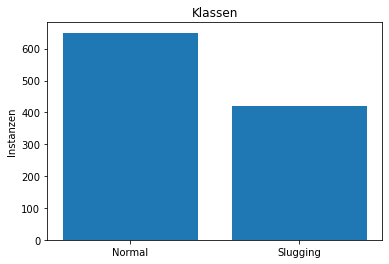

In [13]:
n_f = 1
#Verteilung Klassen
n_n = np.count_nonzero(df_t['Slugflow']==0)
n_s = np.count_nonzero(df_t['Slugflow']==1)
plt.figure(num=n_f)
n_f = n_f+1
plt.bar(["Normal", "Slugging"], [n_n, n_s])
plt.ylabel("Instanzen")
plt.title("Klassen")
print("\nAnzahl Instanzen je Klase; Normal: ", n_n, " Slugging: ", n_s)
print("Verhältnis normal/slugging: ", n_n/n_f)

In [18]:
dt= 1/5000
ts = 30
t=np.arange(0,ts,dt)
n=len(t)
x = df.iloc[0:30*5000]['P17-B05']
xf= np.fft.fft(x)
xpsd=x*np.conj(xf)/n
freq= (1/(30*5000))*np.arange(n)
L = np.arange(1,np.floor(n/2), dtype='int')

C:\Users\Markus Esser\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


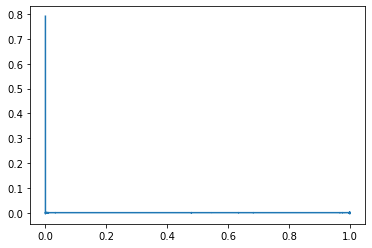

In [21]:
plt.plot(freq, xpsd)

In [ ]:
#Fisher Score
##df_t
fish_sc = pd.DataFrame([fisher_score(df_t[i],df_t['Slugflow']) for i in col], columns=['0', '1'])
fish_sc['Messpunkt'] = col
fish_sc_melt = pd.melt(fish_sc, id_vars='Messpunkt', value_vars=['0', '1'], var_name='Slugging')
fs_n= sns.barplot(x='Messpunkt', y='value', hue='Slugging', data=fish_sc_melt)
fs_n.set_title("Fisher Score pre FFT")
plt.savefig('Abbildungen/pressure_FS_preFFT.png')

In [ ]:
#IG
import sklearn.feature_selection as skf
##df_t
ig_t= skf.mutual_info_classif(df_t.iloc[:][col], df_t['Slugflow'])
plt.figure(num=n_f)
n_f = n_f+1
plt.bar(col, ig_t)
plt.xlabel("Sensor")
plt.ylabel("Information Gain [-]")
plt.title("Information Gain Drucksensoren preFFT")

In [ ]:
##df_t
df_s = df_t[df_t['Slugflow']==1]
df_n = df_t[df_t['Slugflow']==0]
df_median = df_t[col].median()
df_s_median = df_s[col].median()
df_n_median = df_n[col].median()
plt.figure(num=n_f)
n_f = n_f+1
plt.plot(df_median, "r--") #Median beide Klassen
plt.plot(df_s_median, "bo-")
plt.plot(df_n_median, "o-", color='orange')
plt.xlabel("Sensor")
plt.ylabel("Druck [barg]")
plt.title("Mediane der Drucksensoren")
plt.legend(['Alle', 'Slugging', 'Normal'])

In [ ]:
#Boxplot (https://seaborn.pydata.org/examples/horizontal_boxplot.html)
##df_t
plt.figure(num=n_f)
n_f = n_f+1
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="value", y="Messpunkt", data=data_t, hue="Slugflow", whis=[0, 100], width=.6, palette="vlag")

In [ ]:
def fft(da,dr):
    da_f=da.drop(columns=dr)
    da_f = pd.DataFrame((np.fft.fft(da_f.iloc[:][col])*np.conj(np.fft.fft(da_f.iloc[:][col]))/len(da_f).real), columns=da_f.columns)
    da_f = da_f.assign(Slugflow=da['Slugflow'])
    return da_f

In [ ]:
#Erstellen ParrallelDatensatz (auch kurz) FF-transformiert
df_f= fft(df_t, 'Slugflow')
data_f = pd.melt(df_f, id_vars= 'Slugflow', value_vars= col, var_name="Messpunkt")

In [ ]:
fish_sc_f = pd.DataFrame([fisher_score(df_f[i],df_f['Slugflow']) for i in col], columns=['0', '1'])
fish_sc_f['Messpunkt'] = col
fish_sc_f_melt = pd.melt(fish_sc_f, id_vars='Messpunkt', value_vars=['0', '1'], var_name='Slugging')
fs_f= sns.barplot(x='Messpunkt', y='value', hue='Slugging', data=fish_sc_f_melt)
fs_f.set_title("Fisher Score post FFT")
#plt.savefig('Abbildungen/pressure_FS_postFFT.png')

In [ ]:
df_f

In [ ]:
plt.plot(range(0,len(df.iloc[0:30*5000]['P17-B05'])), df.iloc[0:30*5000]['P17-B05'])
plt.title("P17-B05")
plt.xlabel("Messreihe")
plt.ylabel("Druck [barg]")

In [ ]:
print(df_f)

In [ ]:
p = df['P8-B10']
pf = np.fft.fft(p)